---
---

<center>

##### &nbsp;

# **IBM - Machine Learning Professional Certificate**


## **Deep Learning in Convolutional Neural Network**


### **CT-Based Brain Tumor, Cancer, and Aneurysm Detection with CNNs**

### **JingZeng Xie**

</center>

<br/>
<br/>

---
---

# **TABLE OF CONTENTS**

<big>[**1. INTRODUCTION**](#1)</big>

- [**1.1 - Introduction**](#1.1)
- [**1.2 - Objective**](#1.2)
- [**1.3 - Coding Environment**](#1.3)

<big>[**2. DATA PROCESSING**](#2)

- [**2.1 - Data Collection**](#2.1)
- [**2.2 - Data Description**](#2.2)
- [**2.3 - Quality Assessment**](#2.3)
  - [2.3.1 - Missing Value](#2.3.1)
  - [2.3.2 - Invalid Value](#2.3.2)
  - [2.3.3 - Duplicate Value](#2.3.3)
- [**2.4 - Image Augmentation**](#2.4)
- [**2.5 - Exploratory Data Analysis**](#2.5)
  - [2.5.1 - Data Visualization Analysis](#2.5.1)

<big>[**3. MODELING**](#3)</big>

- [**3.1 - Data Splitting**](#3.1)
- [**3.2 - Evaluation Metric**](#3.2)
- [**3.3 - Convolutional Neural Network (CNN)**](#3.3)
  - [3.3.1 - Classic Convolutional Neural Network](#3.3.1)
  - [3.3.2 - CNN with Dropout Layer](#3.3.2)
  - [3.3.3 - CNN with Batch Normalization Layer](#3.3.3)
  - [3.3.4 - CNN with Dropout and Batch Normalization](#3.3.4)

<big>[**4. SUMMARY**](#4)</big>

- [**4.1 - Models Evaluation**](#4.1)
- [**4.2 - Summary**](#4.2)

<big>[**5. REFERENCES**](#5)</big>


---
---

# **1. INTRODUCTION** <span id="1"></span>

---
---

## **1.1 - Introduction** <span id="1.1"></span>



This project aims to enhance the detection of brain tumors, cancer, and aneurysms through the application of Convolutional Neural Networks (CNNs) on images derived from Computed Tomography (CT) scans. CNNs are highly effective for medical image analysis due to their unique convolutional architecture, which facilitates the learning of spatial hierarchies and the automatic identification of critical features within intricate image data.

<br/>

The project will begin with a comprehensive preprocessing of the dataset, including image augmentation techniques such as rotation, scaling, and flipping, to ensure high data quality for model training..

<br/>

We will develop and train a CNN architecture specifically designed to detect anomalies in the CT scan images. The model will be fine-tuned using techniques such as dropout and batch normalization to enhance its performance. The effectiveness of the model will be evaluated using metrics such as accuracy, train/validation loss and confusion matrix, as these metrics provide a comprehensive view of the model's performance in detecting anomalies, balancing between false positives and false negatives.

<br/>

The ultimate goal of this project is to create a robust model that can accurately detect brain tumors, cancer, and aneurysms in CT scan images, thereby contributing to improved diagnostic tools in medical practice and potentially enhancing early detection and treatment outcomes for patients.



---

## **1.2 - Objective** <span id="1.2"></span>



- **Main Objective**: This analysis aims to assess the performance of Convolutional Neural Networks (CNNs) in the detection of brain tumors, cancer, and aneurysms.

- **Dataset Overview**: The study utilizes a dataset comprising brain CT scan images related to cancer, tumors, and aneurysms, summarizing its key attributes and characteristics.

- **Data Exploration and Preparation**: This section provides a brief overview of the data exploration process, detailing the actions taken for data cleaning and feature engineering to enhance the quality and applicability of the dataset.

- **Model Training and Comparison**: We summarize the training of the CNN model with various hyperparameters, examining their effects on detection performance.

- **Final Model Evaluation**: By employing relevant categorical metrics, we identify the hyperparameters that optimize the CNN model, specifically evaluating its accuracy.

- **Key Findings and Insights**: A summary of the key findings and insights is presented, highlighting the primary drivers behind the final model and the valuable insights gained through the modeling process.

---

## **1.3 - Coding Environment** <span id="1.3"></span>



The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import cv2

---
---

# **2. DATA PROCESSING** <span id="2"></span>

---
---

## **2.1 - Data Collection** <span id="2.1"></span>




The "[Computed Tomography (CT) of the Brain](https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-brain/data?select=files)" dataset comprises a comprehensive collection of imaging data derived from Computed Tomography (CT) scans. This dataset is crucial for the analysis and detection of brain tumors, cancers, and aneurysms, providing essential insights into the prevalence and characteristics of these conditions. With a focus on high-quality imaging, this dataset serves as a robust foundation for studying diagnostic efficacy and advancing treatment methodologies.

<br/>

Each entry in the dataset corresponds to a CT scan image, specifically curated to represent various types of brain tumors, cancers, and aneurysms. This allows for an in-depth examination of their distinct features as they appear in imaging data.

<br/>

This dataset serves several important purposes:

- **Development of Predictive Models**: It can be leveraged to build advanced machine learning models, particularly Convolutional Neural Networks (CNNs), for the automated detection and classification of brain tumors, cancers, and aneurysms.

- **Analysis of Imaging Patterns**: Researchers can explore imaging patterns, enhancing the understanding of how different tumors and aneurysms manifest in CT scans.

<br/>

Overall, the dataset is an invaluable resource for researchers and practitioners striving to enhance the detection, diagnosis, and treatment of brain-related diseases using cutting-edge machine learning techniques.


In [ ]:
# Loading the dataset from local drive
data_path = ("/content/Brain CTs")

data_loaded = image_dataset_from_directory( data_path, image_size = (256, 256) )

data = pd.DataFrame(columns=["Pixel", "Label", "Diagnosis"])
for images, labels in data_loaded:
  for i in range(len(labels)):
    data.loc[len(data)] = [ images[i].numpy().astype("uint8"),
                  labels[i].numpy().astype("int64"),
                  data_loaded.class_names[labels[i]] ]

Found 254 files belonging to 3 classes.


---

## **2.2 - Data Description** <span id="2.2"></span>

The attributes of each row/observation (image) of dataset:

1. **Pixel**:
  - Image height: 256 pixels
  - Image width: 256 pixels
  - Image contains 3 channels:
    - Red channel pixel value range from 0 to 255
    - Blue channel pixel value range from 0 to 255
    - Green channel pixel value range from 0 to 255
  - Image size: 196,608 pixels

2. **Diagnosis**:
  - Categorical feature: Tumors, Cancer, and Aneurysms
  - Data type: Object

3. **Label**:
  - Categorical feature: 0:Tumors, 1:Cancer, and 2:Aneurysms
  - Data type: Integer

In [ ]:
print(data.head())

                                               Pixel  Label Diagnosis
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0  Aneurysm
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2     Tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0  Aneurysm
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1    Cancer
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1    Cancer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pixel      254 non-null    object
 1   Label      254 non-null    int64 
 2   Diagnosis  254 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.0+ KB


In [ ]:
# Display the shapes of image
image_preview = data["Pixel"][0]
print("The shape of the image is " + str(image_preview.shape))

The shape of the image is (256, 256, 3)


**Snapshot of the Dataset**

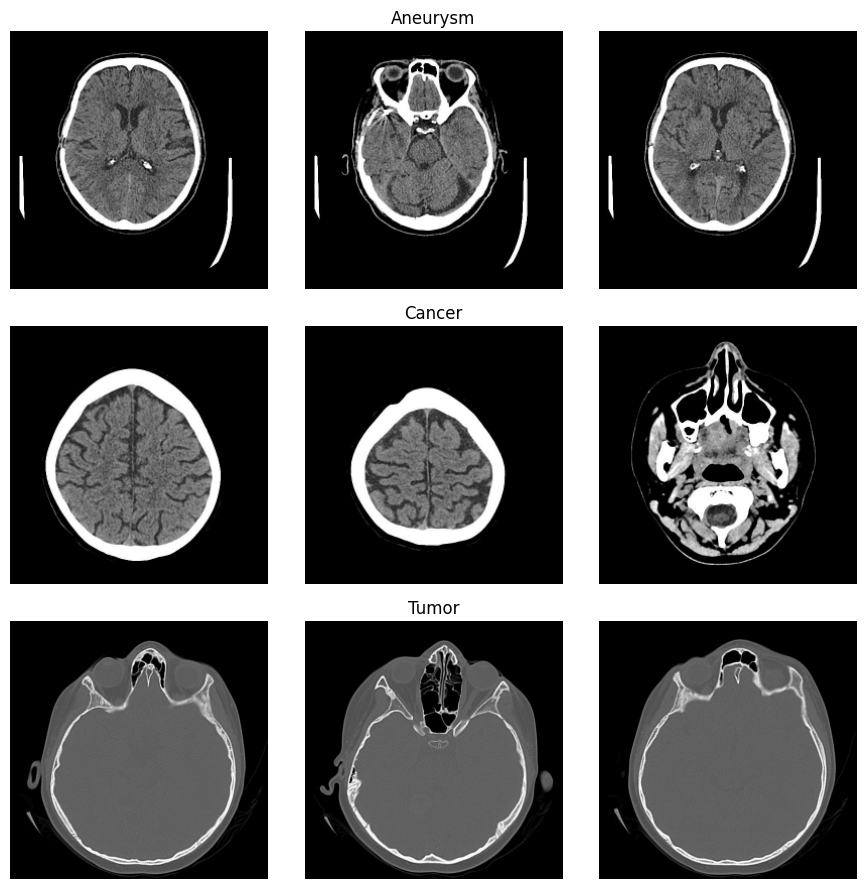

In [ ]:
# Preview the images for each diagnosis type of brain
_, ax = plt.subplots(3, 3, figsize=(9, 9))

for index, (name, images) in enumerate(data.groupby("Diagnosis")):
  ax[index][1].set_title(name)
  for i, image in enumerate(images["Pixel"][:3]):
    ax[index][i].imshow(image)
    ax[index][i].axis('off')

plt.tight_layout()
plt.show()

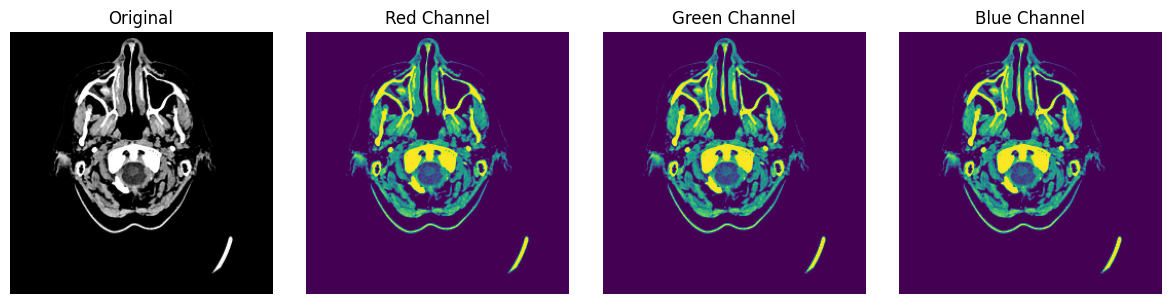

In [ ]:
# Display the different channel of image
plt.figure(figsize=(12, 3))

# Draw the original image
plt.subplot(1, 4, 1)
plt.imshow(image_preview)
plt.title("Original")
plt.axis('off')

# Draw the red, green and blue channel of image
for index, color in enumerate(["Red", "Green", "Blue"]):
  plt.subplot(1, 4, index + 2)
  plt.imshow(image_preview[:, :, 2 - index])
  plt.title(color + " Channel")
  plt.axis('off')

plt.tight_layout()
plt.show()

---

## **2.3 - Quality Assessment** <span id="2.3"></span>

---

### **2.3.1 - Missing Value** <span id="2.3.1"></span>

**Missing Values** contain in most of the real world datasets, i.e., feature entries with no data value stored. As many machine learning algorithms do not support missing values, detecting the missing values and properly handling them, can have a significant impact.

In [ ]:
# Quick check of missing variables
data.isnull().sum()

,0
Pixel,0
Label,0
Diagnosis,0


In [ ]:
#-------------------------------------------------------------------------------
# The summary of missing variables from whole columns
#-------------------------------------------------------------------------------

# Get the name of columns
data_column = list(data.columns)
# Get the total rows
data_row_count = np.array([len(data)] * len(data_column))

# Count of missing variables
data_missing_count = data_row_count - np.array(data.count())
# Missing variables / Total rows
data_missing_rate = np.divide( data_missing_count, data_row_count, out=np.zeros_like(data_missing_count, dtype=float), where=(data_row_count != 0) ) * 100

data_missing_summary = pd.DataFrame( zip( data_column,
                       data_row_count,
                       data_missing_count,
                       data_missing_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Missing Values",
                            "Missing Rate %" ] )

data_missing_summary.sort_values(by="Missing Values", ascending=False)

,Column,Rows,Missing Values,Missing Rate %
0,Pixel,254,0,0.0
1,Label,254,0,0.0
2,Diagnosis,254,0,0.0


---

### **2.3.2 - Invalid Value** <span id="2.3.2"></span>

**Invalid Values** (Badly Formatted Values) refer to inconsistent entries commonly found in datasets, such as variables with different units across data points or incorrect data types. For instance, numerical variables like percentages and fractions are sometimes mistakenly stored as strings. It is essential to detect and correct these cases to ensure that machine learning algorithms can properly process and analyze the actual numerical values.

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Pixel,254,254,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
Diagnosis,254,3,Cancer,89


In [ ]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Label,254.0,1.011811,0.807486,0.0,0.0,1.0,2.0,2.0


Currently, the data types align with those described in the data documentation, and there are no invalid data types present in the dataset.

---

### **2.3.3 - Duplicate Value** <span id="2.3.3"></span>

**Duplicate Values** can appear in various forms, such as multiple entries of the same data point, repeated instances of entire columns, or duplication within an ID variable. While duplicates may be valid in some datasets, they often result from errors during data extraction or integration. Therefore, it is crucial to detect these duplicate values and determine whether they represent true duplicates or are a legitimate part of the dataset.

In [ ]:
# Flattening the pixels of image
data_temp = data["Pixel"].copy()
data["Pixel"] = data['Pixel'].apply(lambda x: ''.join(map(str, x.reshape(-1))))

# Quick check of duplicate row
data.duplicated().sum()

0

In [ ]:
# Quick check of unique value
data_unique_count = data.nunique()

data_unique_count

,0
Pixel,254
Label,3
Diagnosis,3


In [ ]:
#-------------------------------------------------------------------------------
# The summary of duplicate variables from whole columns
#-------------------------------------------------------------------------------

# Unique variables / Total rows
data_duplicate_rate = ( np.ones(len(data_unique_count)) - np.divide( list(data_unique_count), data_row_count, out=np.zeros_like(data_unique_count, dtype=float), where=(data_row_count != 0) ) ) * 100

data_duplicate_summary = pd.DataFrame( zip ( data_column,
                         data_row_count,
                         data_unique_count,
                         data_duplicate_rate),
                     columns = [ "Column",
                             "Rows",
                             "Unique Values",
                             "Duplicate Rate %" ] )

# Send back the images
data["Pixel"] = data_temp

data_duplicate_summary.sort_values(by="Duplicate Rate %", ascending=False)

,Column,Rows,Unique Values,Duplicate Rate %
1,Label,254,3,98.818898
2,Diagnosis,254,3,98.818898
0,Pixel,254,254,0.000000


Upon reviewing the duplicate rows, this indicates that there are no duplicate image in the dataset.

---

## **2.4 - Image Augmentation** <span id="2.4"></span>

**Image Augmentation**, achieved through various transformations applied to training images, generates random modifications that allow models to rely less on specific attributes. This process enhances model optimization and generalization, reduces overfitting, and improves overall robustness.

Commonly used image augmentation techniques include:

1. **Flipping**: This technique involves mirroring the image along a specified axis (horizontal or vertical). Horizontal flipping can enhance model robustness by simulating variations in object orientation.

2. **Rotation**: This technique entails rotating the image by a specified angle (e.g., 90°, 180°, or a random angle within a range). Rotation aids the model in learning to recognize objects from different perspectives and orientations.

3. **Shifting**: Or Translation involves moving the image along the x or y-axis. This simulates slight positional changes of the object within the frame, allowing the model to be less sensitive to precise object placement.

4. **Zooming**: Zooming enlarges or reduces the image to concentrate on a specific area or context. It helps the model learn to identify objects at various scales, enhancing its generalization capabilities across different object sizes.

5. **Cropping**: Or Shearling involves extracting a specific region of the image. This technique helps the model focus on particular aspects of an image or accommodate varying object sizes and positions by providing diverse views of the same object.

6. **Brightness**: Adjusting brightness involves changing the light intensity of the image. This technique helps the model become invariant to lighting conditions, improving its ability to recognize objects in various illumination scenarios.

7. **Contrast**: Modifying contrast adjusts the difference between the darkest and lightest parts of the image. Enhancing or reducing contrast can highlight features and textures, making it easier for the model to distinguish between objects and backgrounds.

**Generating Image Augmentation Layers**

In [ ]:
#-------------------------------------------------------------------------------
# Generating the layers of image augmentation
#-------------------------------------------------------------------------------
'''
# Flipping vertical and horizontal or both
augmentation_flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
# Rotation maxmium in 25 degree
augmentation_rotate = tf.keras.layers.RandomRotation(0.25, fill_mode='constant', fill_value=0.0)
# Zooming maxmium in 20 %
augmentation_zoom = tf.keras.layers.RandomZoom(0.2, fill_mode='constant', fill_value=0.0)
# Shift maximum in 10 % on x or y-axis
augmentation_translation = tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='constant', fill_value=0.0)
# Change brightness in range of 30% up and down
augmentation_brightness = tf.keras.layers.RandomBrightness([-0.3, 0.3])
# Change contrast in range of 20% up and down
augmentation_contrast = tf.keras.layers.RandomContrast(0.2)

# Generating the layers of image augmentation
layers_augmentations = Sequential()

layers_augmentations.add(augmentation_flip)
layers_augmentations.add(augmentation_rotate)
layers_augmentations.add(augmentation_zoom)
layers_augmentations.add(augmentation_translation)
layers_augmentations.add(augmentation_brightness)
layers_augmentations.add(augmentation_contrast)

layers_augmentations.summary()
'''

**Applying Image Augmentation to the Dataset**

In [ ]:
#-------------------------------------------------------------------------------
# Applying image augmentation to the dataset
#-------------------------------------------------------------------------------

# Augmentation the training set
data_train = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                  horizontal_flip = True,   # Horizontal flipping
                  vertical_flip = True,    # Vertical flipping
                  rotation_range = 25,     # Rotation 25 degree
                  width_shift_range = 0.1,   # Shift 10 % on x-axis
                  height_shift_range = 0.05,  # Shift 5 % on y-axis
                  zoom_range = 0.15,      # Zooming 15 %
                  shear_range = 0.2,      # Stretching 20 degree
                  validation_split = 0.3 ) # 70 % as training

# Spliting 70% as training set
data_train = data_train.flow_from_directory( directory = data_path,
                        target_size = (256, 256),
                        class_mode = "categorical",
                        subset = "training",
                        shuffle = True )

# Augmentation the validation set
data_validation = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                     vertical_flip = True,   # Vertical flipping
                     rotation_range = 15,    # Rotation 15 degree
                     width_shift_range = 0.15, # Shift 15 % on x-axis
                     height_shift_range = 0.1, # Shift 10 % on y-axis
                     zoom_range = 0.1,     # Zooming 10 %
                     shear_range = 0.1,     # Stretching 10 degree
                     validation_split = 0.1 ) # 10 % as validation

# Spliting 10% as validation set
data_validation = data_validation.flow_from_directory( directory = data_path,
                             target_size = (256, 256),
                             class_mode = "categorical",
                             subset = "validation",
                             shuffle = False )

# Augmentation the test set
data_test = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                  validation_split = 0.2 ) # 20 % as test set

# Spliting 20% as test set
data_test = data_test.flow_from_directory( directory = data_path,
                       target_size = (256, 256),
                       class_mode = "categorical",
                       subset = "validation" )

**Snapshot of the Dataset after Image Augmentation**

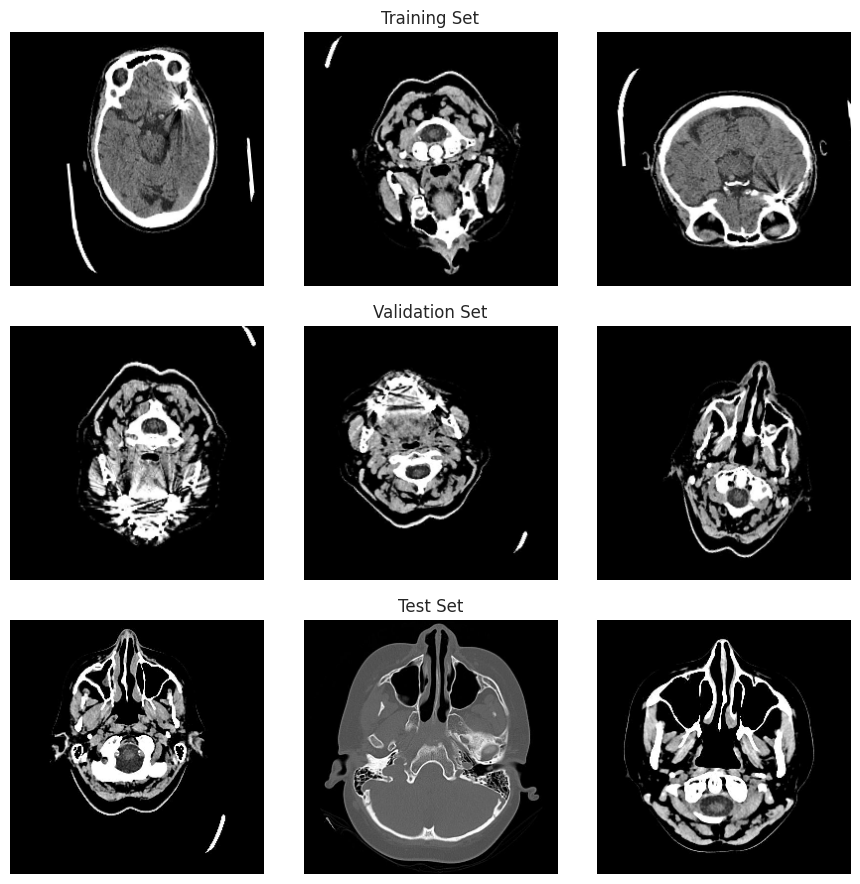

In [ ]:
# Preview the images for each diagnosis type of brain
_, ax = plt.subplots(3, 3, figsize=(9, 9))

ax[0][1].set_title("Training Set")
ax[1][1].set_title("Validation Set")
ax[2][1].set_title("Test Set")

for index, (images, labels) in enumerate([next(data_train), next(data_validation), next(data_test)]):
  for i in range(3):
    ax[index][i].imshow(images[i])
    ax[index][i].axis('off')

plt.tight_layout()
plt.show()

---

## **2.5 - Exploratory Data Analysis** <span id="2.5"></span>

---

### **2.5.1 - Data Visualization Analysis** <span id="2.5.1"></span>

**Data Visualization** is an important component of Exploratory Data Analysis (EDA), because it helps us to understand the variables and relationships between them. These variables could be dependent or independent to each other.

| **Univariate Analysis** | **Bivariate Analysis** | **Multivariate Analysis** |
| :---: | :---: | :---: |
| It only summarize single variable at a time | It only summarize two variables | It only summarize more than 2 variables |
| It does not deal with causes and relationships | It does deal with causes and relationships and analysis is done | It does not deal with causes and relationships and analysis is done |
| The main purpose is to describe | The main purpose is to explain | The main purpose is to study the relationship among them |

In this section, we focus on a multivariate analysis to examine the relationships among the three classifications.

In [ ]:
data_image_mean, data_image_standard_deviation = [], []

for index in range(0, len(data)):
  data_image_mean.append(data["Pixel"][index].mean())
  data_image_standard_deviation.append(np.std(data["Pixel"][index]))

data["Mean"] = data_image_mean
data["Standard Deviation"] = data_image_standard_deviation

**Visualize the Distributions of Image Pixel by Brain Disorders**

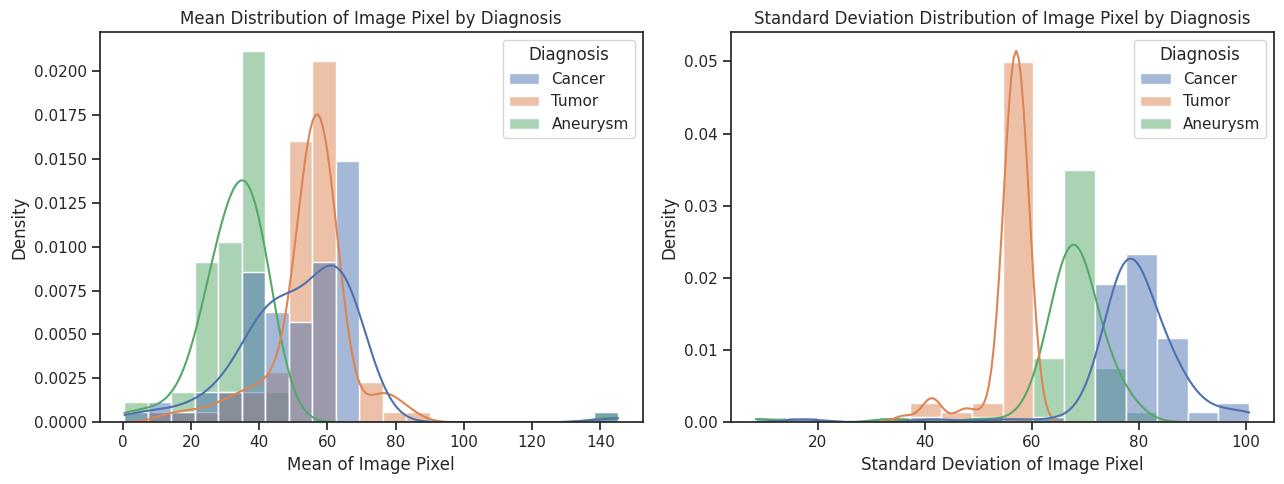

In [ ]:
# Display the mean and standard deviation distribution
_, ax = plt.subplots(1, 2, figsize=(13, 5))

for index, name in enumerate(["Mean", "Standard Deviation"]):
  sns.histplot(data=data, ax=ax[index], x=name, hue="Diagnosis", kde=True, stat="density")
  ax[index].set_title(name + " Distribution of Image Pixel by Diagnosis")
  ax[index].set_xlabel(name + " of Image Pixel")

plt.tight_layout()
plt.show()

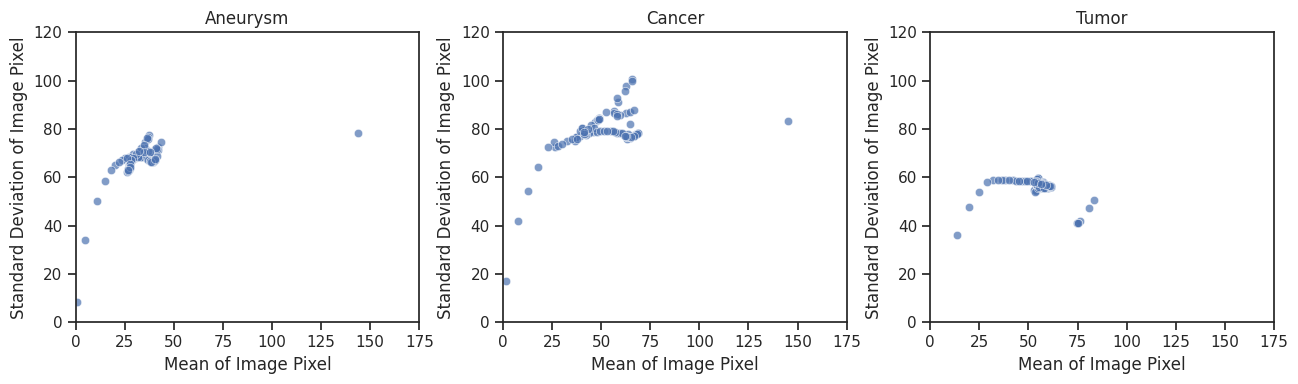

In [ ]:
# Display the mean and standard deviation distribution
_, ax = plt.subplots(1, 3, figsize=(13, 4))

for index, name in enumerate(["Aneurysm", "Cancer", "Tumor"]):
  sns.scatterplot( data = data.loc[data["Diagnosis"] == name],
           ax = ax[index],
           x = "Mean",
           y = "Standard Deviation",
           alpha = 0.7 )

  ax[index].set_xlim(0, 175)
  ax[index].set_ylim(0, 120)
  ax[index].set_xlabel("Mean of Image Pixel")
  ax[index].set_ylabel("Standard Deviation of Image Pixel")
  ax[index].set_title(name)

plt.tight_layout()
plt.show()

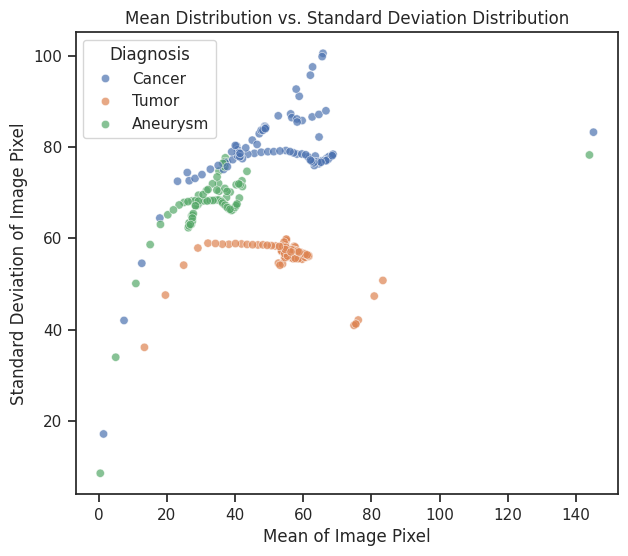

In [ ]:
# Display the mean and standard deviation distribution in one plot
plt.figure(figsize=(7,6))
sns.scatterplot( data = data,
         x = "Mean",
         y = "Standard Deviation",
         hue = "Diagnosis",
         alpha = 0.7 )

plt.xlabel("Mean of Image Pixel")
plt.ylabel("Standard Deviation of Image Pixel")
plt.title("Mean Distribution vs. Standard Deviation Distribution")
plt.show()

In this section we discovered some of the features that the brain diagnostic image contains.

Images diagnosed with **Aneurysm** exhibit the following characteristics:
- Compared to general images, they have a lower average pixel value, resulting in a darker pixels
- A wider range of pixel standard deviation indicates greater contrast variation in the image

Images diagnosed with **Cancer** exhibit the following characteristics:
- Compared to general images, they have a higher average pixel value, resulting in a brighter pixels
- A wider range of pixel standard deviation also indicates greater contrast variation in the image

Images diagnosed with **Tumor** exhibit the following characteristics:
- Compared to general images, they have a higher average pixel value, resulting in a brighter pixels
- A narrower range of pixel standard deviation indicates reduced contrast variation in the image

---
---

# **3. MODELING** <span id="3"></span>

---
---

---

### **3.1 - Data Splitting** <span id="3.1"></span>

**Data Splitting** is a crucial process in machine learning, involving the partitioning of a dataset into different subsets, such as training, validation, and test sets. This is essential for training models, tuning parameters, and ultimately assessing their performance.

- **Training Set** - Used to train the machine learning model, this is the core dataset where the model learns to understand patterns and relationships in the data

- **Validation Set** - Assists in fine-tuning the model. It evaluates the model's performance during the training phase, helping adjust hyperparameters and prevent overfitting

- **Test Set** - Provides a fair evaluation of the model's performance on unseen data. This is crucial for assessing the model's ability to generalize to unknown data

In [ ]:
'''
print("Splitting a training set:")
# Spliting 70% as training set
data_train = image_dataset_from_directory( data_path,
                       label_mode = "categorical",
                       image_size = (256, 256),
                       shuffle = True,
                       seed = 888,
                       validation_split = 0.3,
                       subset = "training" )

print()
print("Splitting a validation set:")
# Spliting 10% as validation set
data_validation = image_dataset_from_directory( data_path,
                          label_mode = "categorical",
                          image_size = (256, 256),
                          shuffle = False,
                          seed = 888,
                          validation_split = 0.1,
                          subset = "validation" )

print()
print("Splitting a test set:")
# Spliting 20% as test set
data_test = image_dataset_from_directory( data_path,
                       label_mode = "categorical",
                       image_size = (256, 256),
                       shuffle = False,
                       seed = 888,
                       validation_split = 0.2,
                       subset = "validation" )
'''

In [ ]:
# Augmentation the training set
data_train = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                  horizontal_flip = True,   # Horizontal flipping
                  vertical_flip = True,    # Vertical flipping
                  rotation_range = 25,     # Rotation 25 degree
                  width_shift_range = 0.1,   # Shift 10 % on x-axis
                  height_shift_range = 0.05,  # Shift 5 % on y-axis
                  zoom_range = 0.15,      # Zooming 15 %
                  shear_range = 0.1,      # Stretching 10 %
                  validation_split = 0.296 ) # 70 % as training

print("Splitting a training set:")
# Spliting 70% as training set
data_train = data_train.flow_from_directory( directory = data_path,
                        target_size = (256, 256),
                        class_mode = "categorical",
                        subset = "training",
                        shuffle = True )

# Augmentation the validation set
data_validation = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                     vertical_flip = True,   # Vertical flipping
                     rotation_range = 15,    # Rotation 15 degree
                     width_shift_range = 0.15, # Shift 15 % on x-axis
                     height_shift_range = 0.1, # Shift 10 % on y-axis
                     zoom_range = 0.1,     # Zooming 10 %
                     shear_range = 0.1,     # Stretching 10 %
                     validation_split = 0.1 ) # 10 % as validation

print()
print("Splitting a validation set:")
# Spliting 10% as validation set
data_validation = data_validation.flow_from_directory( directory = data_path,
                             target_size = (256, 256),
                             class_mode = "categorical",
                             subset = "validation",
                             shuffle = False )

# Augmentation the test set
data_test = ImageDataGenerator( rescale = 1./255,      # Rescaling to [0, 1]
                  validation_split = 0.202 ) # 20 % as test set

print()
print("Splitting a test set:")
# Spliting 20% as test set
data_test = data_test.flow_from_directory( directory = data_path,
                       target_size = (256, 256),
                       class_mode = "categorical",
                       subset = "validation",
                       shuffle = False )

Splitting a training set:
Found 181 images belonging to 3 classes.

Splitting a validation set:
Found 24 images belonging to 3 classes.

Splitting a test set:
Found 49 images belonging to 3 classes.


---

### **3.2 - Evaluation Metric** <span id="3.2"></span>

The following metrics are widely used in machine learning to evaluate classifier model performance:

* **Accuracy**
  - An metric that measures the proportion of correct predictions made by a model over the total number of predictions made
  - Provide a good overall assessment of the model's performance when the classes are balanced
  - It can be misleading in imbalanced datasets and does not differentiate between types of errors

* **Loss**
  - Loss is a metric used to assess how a deep learning model fits the training and validation data. It assesses the error of the model on both dataset
  - The training loss is calculated by taking the sum of errors for each example in the training set
  - The validation loss is calculated by taking the sum of errors for each example in the validation set

In [ ]:
# Setup the function to draw accuracy metric of model performance
def draw_accuracy_CNN_model(model_name, axes, model_history):
  model_plot_data = pd.DataFrame( { "Epoch" : range(1, len(model_history.history["accuracy"]) + 1),
                     "Train" : model_history.history["accuracy"],
                     "Validation" : model_history.history["val_accuracy"] } )
  model_plot_data = pd.melt(model_plot_data, ["Epoch"])

  sns.lineplot(data=model_plot_data, ax=axes, x="Epoch", y="value", hue="variable")

  axes.set_ylim(0, 1.1)
  axes.set_xlabel("Epochs")
  axes.set_ylabel("Accuracy")
  axes.set_title("Accuracy Metric of Convolutional Neural Network (CNN): " + model_name)
  return axes

# Setup the function to draw loss metric of model performance
def draw_loss_CNN_model(model_name, axes, model_history):
  model_plot_data = pd.DataFrame( { "Epoch" : range(1, len(model_history.history["accuracy"]) + 1),
                     "Train" : model_history.history["loss"],
                     "Validation" : model_history.history["val_loss"] } )
  model_plot_data = pd.melt(model_plot_data, ["Epoch"])

  sns.lineplot(data=model_plot_data, ax=axes, x="Epoch", y="value", hue="variable")

  axes.set_ylim(0, 20)
  axes.set_xlabel("Epochs")
  axes.set_ylabel("Loss")
  axes.set_title("Loss Metric of Convolutional Neural Network (CNN): " + model_name)
  return axes

---

### **3.3 - Convolutional Neural Network (CNN)** <span id="3.3"></span>

**Neural Networks** are the heart of deep learning algorithms. They are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Each node connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

**Convolutional Neural Network (CNN)** provide a scalable approach to image classification and object recognition tasks, leveraging principles from linear algebra, specifically matrix multiplication, to identify patterns within an image.

CNN have three main types of layers, which are:

1. **Convolutional Layer**
  - The convolutional layer is the first layer, and it's the core building block of CNN that requires a few components, which are **input data**, a **filter**, and a **feature map**
  - Input images are represented as 3D matrices corresponding to height, width, and depth (RGB channels), and the feature detector moves across receptive fields in the image to identify features through a process called convolution
  - The filter is a 2D array of weights, that computes a dot product with input pixels as it sweeps across the image. This process generates a feature map (or activation map) that captures the presence of specific features in the image

2. **Pooling Layer**
  - **Max Pooling** selects the maximum value in the receptive field
  - **Average Pooling** computes the average value in the receptive field
  - It reduce complexity, improve efficiency, and help prevent overfitting as well
  - It reduce the number of parameters in the input, making the model more efficient


3. **Fully-Connected (FC) Layer**
  - The FC layer is the final layer of a convolutional network, and it's characterized by its direct connections between each node in the output layer and every node in the previous layer, in contrast to partially connected layers
  - This layer is responsible for classification tasks based on the features extracted from earlier convolutional and pooling layers, utilizing various filters
  - While convolutional and pooling layers commonly use ReLU activation functions, fully connected layers typically employ a softmax activation function to classify inputs, resulting in probabilities ranging from 0 to 1

---

#### **3.3.1 - Classic Convolutional Neural Network** <span id="3.3.1"></span>

The classic convolutional neural network (CNN) model is structured using the following layers, with the corresponding hyperparameters for each layer specified during model training:

- **Convolutional Layer**: 3 layers
  1. **2-Dimensions Convolution Layer**: 3 layers
    - **Filters**: The dimension of the output space (the number of filters in the convolution).
    - **Kernel Size**: The size of the convolution window, should be 2-D array.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.
    - **Padding**: `valid` means no padding; `same` results in padding evenly to the left/right or up/down of the input.

- **Pooling Layer**: 3 layers
  1. **Average Pooling Layer**: 1 layer
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).
  2. **Maximum Pooling Layer**: 2 layers
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).

- **Fully-Connected (FC) Layer**: 3 layers
  1. **Flatten Layer**: 1 layer
  2. **Dense Layer with Activation**: 2 layers
    - **Units**: A integer represent the dimensionality or numbers of the output space.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.

In [ ]:
# Initialization the model
model_CNN_classic = Sequential()

# Convolutional Layer - 2-Dimensions Convolution Layer - 1
model_CNN_classic.add( Conv2D( filters = 32,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Average Pooling Layer - 1
model_CNN_classic.add( AvgPool2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 2
model_CNN_classic.add( Conv2D( filters = 64,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Maximum Pooling Layer - 2
model_CNN_classic.add( MaxPooling2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 3
model_CNN_classic.add( Conv2D( filters = 32,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Maximum Pooling Layer - 3
model_CNN_classic.add( MaxPooling2D( pool_size = (2, 2) ) )

# Fully-Connected (FC) Layer - Flatten Layer - 1
model_CNN_classic.add( Flatten() )

# Fully-Connected (FC) Layer - Dense Layer - 2
model_CNN_classic.add( Dense( units = 2048, activation = "relu" ) )

# Fully-Connected (FC) Layer - Dense Layer - 3
model_CNN_classic.add( Dense( units = 3, activation = "softmax" ) )

# Compile the CNN model
model_CNN_classic.compile( loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy", ] )

In [ ]:
model_CNN_classic.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 128, 128, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,464,747 (768.53 MB)

 Trainable params: 67,154,915 (256.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,309,832 (512.35 MB)

In [ ]:
model_CNN_classic_history = model_CNN_classic.fit(data_train, validation_data=data_validation, epochs=100)

**Visualizing Model Performance During Training**

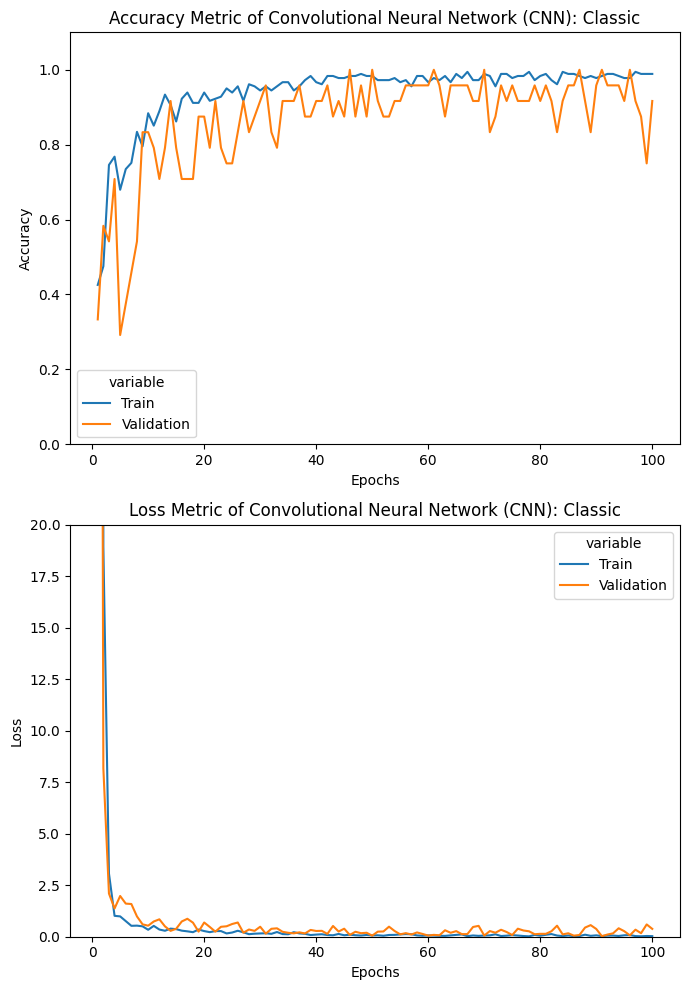

In [ ]:
# Display the accuracy and loss of both sets during model training
_, ax = plt.subplots(2, 1, figsize=(7, 10))

ax[0] = draw_accuracy_CNN_model("Classic", ax[0], model_CNN_classic_history)
ax[1] = draw_loss_CNN_model("Classic", ax[1], model_CNN_classic_history)

plt.tight_layout()
plt.show()

---

#### **3.3.2 - CNN with Dropout Layer** <span id="3.3.2"></span>

The convolutional neural network (CNN) model with dropout layers is structured using the following layers, with the corresponding hyperparameters for each layer specified during model training:

- **Convolutional Layer**: 3 layers
  1. **2-Dimensions Convolution Layer**: 3 layers
    - **Filters**: The dimension of the output space (the number of filters in the convolution).
    - **Kernel Size**: The size of the convolution window, should be 2-D array.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.
    - **Padding**: `valid` means no padding; `same` results in padding evenly to the left/right or up/down of the input.

- **Pooling Layer**: 3 layers
  1. **Average Pooling Layer**: 1 layer
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).
  2. **Maximum Pooling Layer**: 2 layers
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).

- **Fully-Connected (FC) Layer**: 3 layers
  1. **Flatten Layer**: 1 layer
  2. **Dense Layer with Activation**: 2 layers
    - **Units**: A integer represent the dimensionality or numbers of the output space.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.

- **Dropout Layer**: 1 layer
  - **Rate**: Float between 0 and 1. Fraction of the input units to drop.

In [ ]:
# Initialization the model
model_CNN_dropout = Sequential()

# Convolutional Layer - 2-Dimensions Convolution Layer - 1
model_CNN_dropout.add( Conv2D( filters = 32,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Average Pooling Layer - 1
model_CNN_dropout.add( AvgPool2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 2
model_CNN_dropout.add( Conv2D( filters = 64,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Maximum Pooling Layer - 2
model_CNN_dropout.add( MaxPooling2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 3
model_CNN_dropout.add( Conv2D( filters = 32,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same" ) )

# Pooling Layer - Maximum Pooling Layer - 3
model_CNN_dropout.add( MaxPooling2D( pool_size = (2, 2) ) )

# Fully-Connected (FC) Layer - Flatten Layer - 1
model_CNN_dropout.add( Flatten() )

# Dropout Layer - 1
model_CNN_dropout.add( Dropout( rate = 0.2 ) )

# Fully-Connected (FC) Layer - Dense Layer - 2
model_CNN_dropout.add( Dense( units = 2048, activation = "relu" ) )

# Fully-Connected (FC) Layer - Dense Layer - 3
model_CNN_dropout.add( Dense( units = 3, activation = "softmax" ) )

# Compile the CNN model
model_CNN_dropout.compile( loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"] )

In [ ]:
model_CNN_dropout.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 128, 128, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,464,747 (768.53 MB)

 Trainable params: 67,154,915 (256.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,309,832 (512.35 MB)

In [ ]:
model_CNN_dropout_history = model_CNN_dropout.fit(data_train, validation_data=data_validation, epochs=100)

**Visualizing Model Performance During Training**

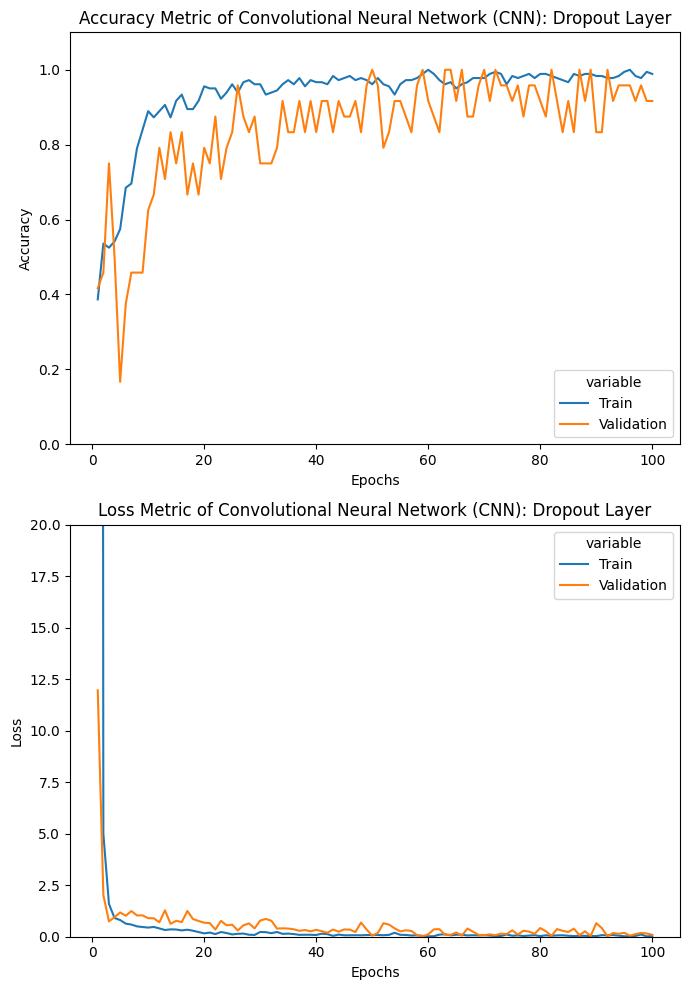

In [ ]:
# Display the accuracy and loss of both sets during model training
_, ax = plt.subplots(2, 1, figsize=(7, 10))

ax[0] = draw_accuracy_CNN_model("Dropout Layer", ax[0], model_CNN_dropout_history)
ax[1] = draw_loss_CNN_model("Dropout Layer", ax[1], model_CNN_dropout_history)

plt.tight_layout()
plt.show()

---

#### **3.3.3 - CNN with Batch Normalization Layer** <span id="3.3.3"></span>

The convolutional neural network (CNN) model with batch normalization layers is structured using the following layers, with the corresponding hyperparameters for each layer specified during model training:

- **Convolutional Layer**: 3 layers
  1. **2-Dimensions Convolution Layer**: 3 layers
    - **Filters**: The dimension of the output space (the number of filters in the convolution).
    - **Kernel Size**: The size of the convolution window, should be 2-D array.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.
    - **Padding**: `valid` means no padding; `same` results in padding evenly to the left/right or up/down of the input.

- **Pooling Layer**: 3 layers
  1. **Average Pooling Layer**: 1 layer
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).
  2. **Maximum Pooling Layer**: 2 layers
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).

- **Fully-Connected (FC) Layer**: 3 layers
  1. **Flatten Layer**: 1 layer
  2. **Dense Layer with Activation**: 2 layers
    - **Units**: A integer represent the dimensionality or numbers of the output space.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.

- **Batch Normalization Layer**: 3 layer

In [ ]:
# Initialization the model
model_CNN_BN = Sequential()

# Convolutional Layer - 2-Dimensions Convolution Layer - 1
model_CNN_BN.add( Conv2D( filters = 32,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 1
model_CNN_BN.add( BatchNormalization() )

# Pooling Layer - Average Pooling Layer - 1
model_CNN_BN.add( AvgPool2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 2
model_CNN_BN.add( Conv2D( filters = 64,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 2
model_CNN_BN.add( BatchNormalization() )

# Pooling Layer - Maximum Pooling Layer - 2
model_CNN_BN.add( MaxPooling2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 3
model_CNN_BN.add( Conv2D( filters = 32,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 3
model_CNN_BN.add( BatchNormalization() )

# Pooling Layer - Maximum Pooling Layer - 3
model_CNN_BN.add( MaxPooling2D( pool_size = (2, 2) ) )

# Fully-Connected (FC) Layer - Flatten Layer - 1
model_CNN_BN.add( Flatten() )

# Fully-Connected (FC) Layer - Dense Layer - 2
model_CNN_BN.add( Dense( units = 2048, activation = "relu" ) )

# Fully-Connected (FC) Layer - Dense Layer - 3
model_CNN_BN.add( Dense( units = 3, activation = "softmax" ) )

# Compile the CNN model
model_CNN_BN.compile( loss = "categorical_crossentropy",
            optimizer = "adam",
            metrics = ["accuracy"] )

In [ ]:
model_CNN_BN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 128, 128, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,465,771 (768.53 MB)

 Trainable params: 67,155,171 (256.18 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 134,310,344 (512.35 MB)

In [ ]:
model_CNN_BN_history = model_CNN_BN.fit(data_train, validation_data=data_validation, epochs=100)

**Visualizing Model Performance During Training**

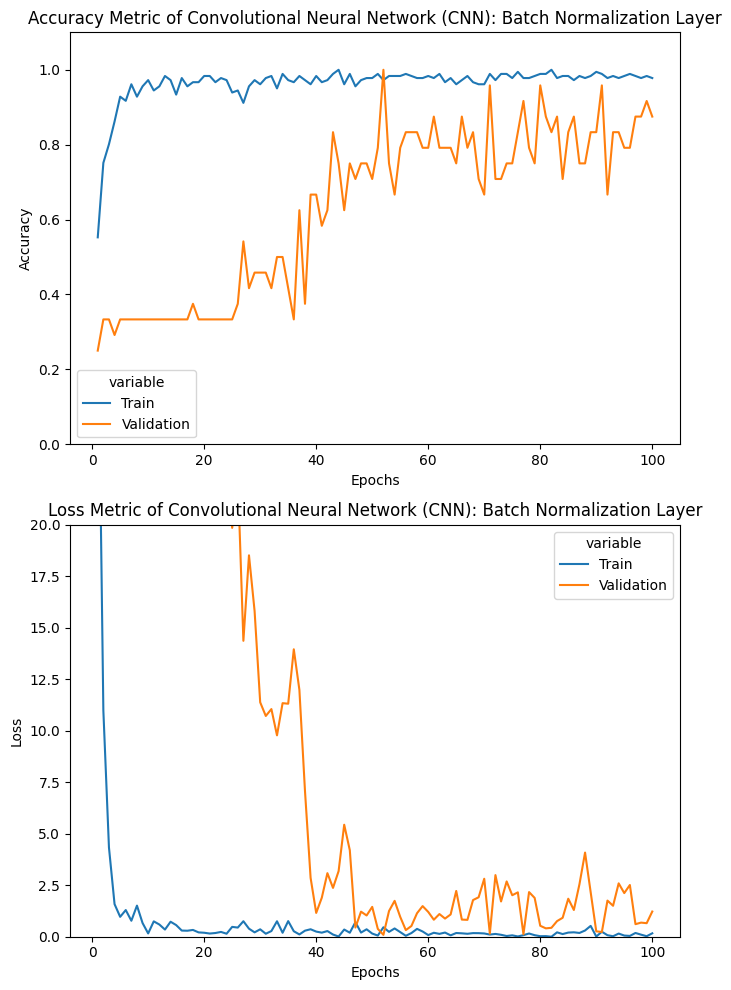

In [ ]:
# Display the accuracy and loss of both sets during model training
_, ax = plt.subplots(2, 1, figsize=(7, 10))

ax[0] = draw_accuracy_CNN_model("Batch Normalization Layer", ax[0], model_CNN_BN_history)
ax[1] = draw_loss_CNN_model("Batch Normalization Layer", ax[1], model_CNN_BN_history)

plt.tight_layout()
plt.show()

---

#### **3.3.4 - CNN with Dropout and Batch Normalization** <span id="3.3.4"></span>

The convolutional neural network (CNN) model with dropout and batch normalization layers is structured using the following layers, with the corresponding hyperparameters for each layer specified during model training:

- **Convolutional Layer**: 3 layers
  1. **2-Dimensions Convolution Layer**: 3 layers
    - **Filters**: The dimension of the output space (the number of filters in the convolution).
    - **Kernel Size**: The size of the convolution window, should be 2-D array.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.
    - **Padding**: `valid` means no padding; `same` results in padding evenly to the left/right or up/down of the input.

- **Pooling Layer**: 3 layers
  1. **Average Pooling Layer**: 1 layer
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).
  2. **Maximum Pooling Layer**: 2 layers
    - **Pool Size**: Tuple of 2 integers, factors by which to downscale (dim1,  dim2).

- **Fully-Connected (FC) Layer**: 3 layers
  1. **Flatten Layer**: 1 layer
  2. **Dense Layer with Activation**: 2 layers
    - **Units**: A integer represent the dimensionality or numbers of the output space.
    - **Activation**: `relu` applies the rectified linear unit activation function; `sigmoid` applies the sigmoid activation function; `softmax` means softmax converts a vector of values to a probability distribution.

- **Dropout Layer**: 1 layer
  - **Rate**: Float between 0 and 1. Fraction of the input units to drop.

- **Batch Normalization Layer**: 3 layer

In [ ]:
# Initialization the model
model_CNN_dropout_BN = Sequential()

# Convolutional Layer - 2-Dimensions Convolution Layer - 1
model_CNN_dropout_BN.add( Conv2D( filters = 32,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 1
model_CNN_dropout_BN.add( BatchNormalization() )

# Pooling Layer - Average Pooling Layer - 1
model_CNN_dropout_BN.add( AvgPool2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 2
model_CNN_dropout_BN.add( Conv2D( filters = 64,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 2
model_CNN_dropout_BN.add( BatchNormalization() )

# Pooling Layer - Maximum Pooling Layer - 2
model_CNN_dropout_BN.add( MaxPooling2D( pool_size = (2, 2) ) )

# Convolutional Layer - 2-Dimensions Convolution Layer - 3
model_CNN_dropout_BN.add( Conv2D( filters = 32,
              kernel_size = (3, 3),
              activation = "relu",
              padding = "same" ) )

# Batch Normalization Layer - 3
model_CNN_dropout_BN.add( BatchNormalization() )

# Pooling Layer - Maximum Pooling Layer - 3
model_CNN_dropout_BN.add( MaxPooling2D( pool_size = (2, 2) ) )

# Fully-Connected (FC) Layer - Flatten Layer - 1
model_CNN_dropout_BN.add( Flatten() )

# Dropout Layer - 1
model_CNN_dropout.add( Dropout( rate = 0.2 ) )

# Fully-Connected (FC) Layer - Dense Layer - 2
model_CNN_dropout_BN.add( Dense( units = 2048, activation = "relu" ) )

# Fully-Connected (FC) Layer - Dense Layer - 3
model_CNN_dropout_BN.add( Dense( units = 3, activation = "softmax" ) )

# Compile the CNN model
model_CNN_dropout_BN.compile( loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"] )

In [ ]:
model_CNN_dropout_BN.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 128, 128, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,465,771 (768.53 MB)

 Trainable params: 67,155,171 (256.18 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 134,310,344 (512.35 MB)

In [ ]:
model_CNN_dropout_BN_history = model_CNN_dropout_BN.fit(data_train, validation_data=data_validation, epochs=100)

**Visualizing Model Performance During Training**

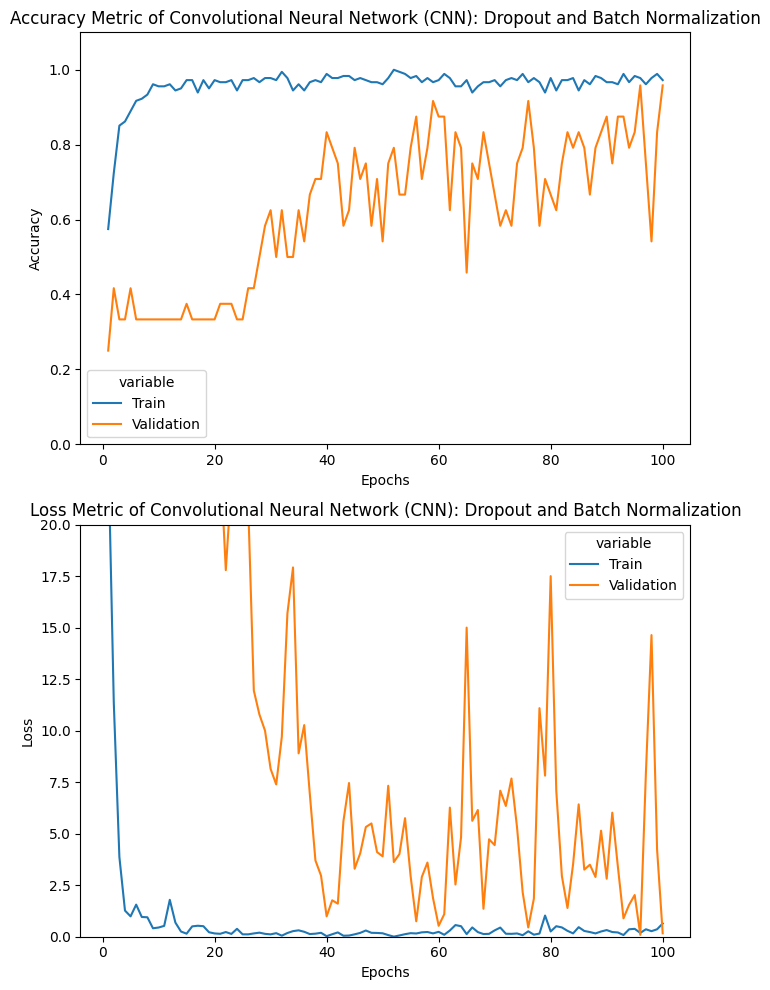

In [ ]:
# Display the accuracy and loss of both sets during model training
_, ax = plt.subplots(2, 1, figsize=(7, 10))

ax[0] = draw_accuracy_CNN_model("Dropout and Batch Normalization", ax[0], model_CNN_dropout_BN_history)
ax[1] = draw_loss_CNN_model("Dropout and Batch Normalization", ax[1], model_CNN_dropout_BN_history)

plt.tight_layout()
plt.show()

---
---

# **4. SUMMARY** <span id="4"></span>

---
---

---

### **4.1 - Models Evaluation** <span id="4.1"></span>

We will now compare the prediction results of convolutional neural network model with various hyperparameters on both the training and test sets. The most suitable hyperparameter for our convolutional neural network model will be selected based on metrics such as Accuracy, Loss and Confusion Matrix.

**Model Evaluation Using Accuracy Metric on the Training Set**

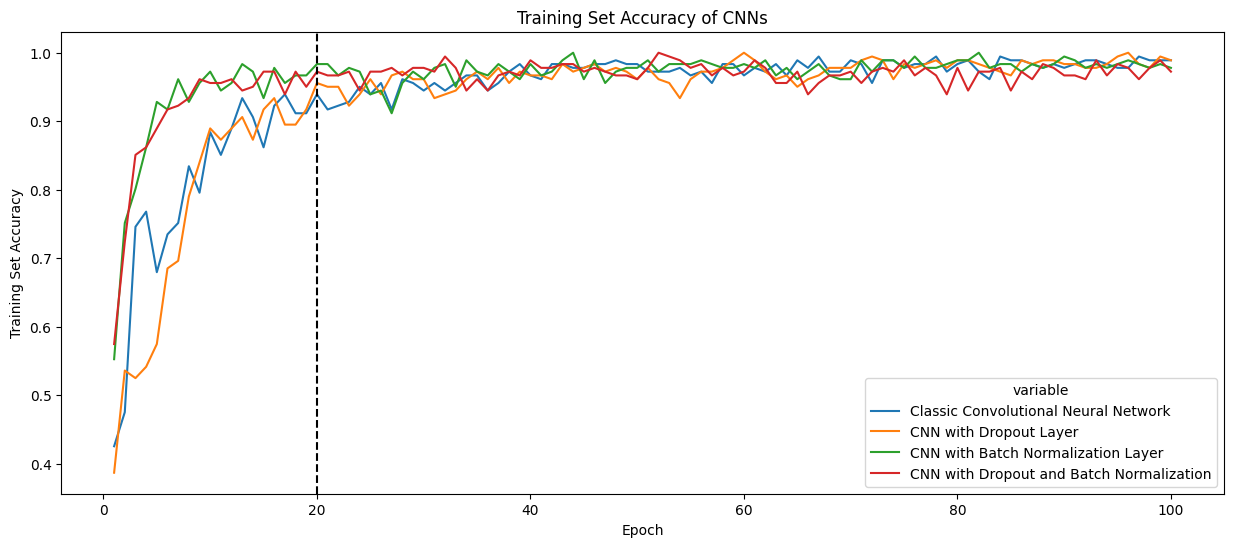

In [ ]:
# Merging the histories of different CNN
model_scores_train_accuracy = pd.DataFrame( { "Epoch" : range(1, len(model_CNN_classic_history.history["accuracy"]) + 1),
                         "Classic Convolutional Neural Network" : model_CNN_classic_history.history["accuracy"],
                         "CNN with Dropout Layer" : model_CNN_dropout_history.history["accuracy"],
                         "CNN with Batch Normalization Layer" : model_CNN_BN_history.history["accuracy"],
                         "CNN with Dropout and Batch Normalization" : model_CNN_dropout_BN_history.history["accuracy"] } )
model_scores_train_accuracy = pd.melt(model_scores_train_accuracy, ["Epoch"])

# Draw a line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=model_scores_train_accuracy, x="Epoch", y="value", hue="variable")
plt.title("Training Set Accuracy of CNNs")
plt.ylabel("Training Set Accuracy")
plt.xlabel("Epoch")
plt.axvline(x=20, color="black", linestyle="--")
plt.show()

In the figure above, a close examination of the epochs from 0 to 20 reveals that the convolutional neural network model with the batch normalization layer converges more quickly compared to models without it.

**Model Evaluation Based on the Accuracy Metric**

In [ ]:
model_scores_accuracy = { "Train" : [], "Validation" : [], "Test" : [] }
model_scores_loss = { "Train" : [], "Validation" : [], "Test" : [] }

for model in [model_CNN_classic, model_CNN_dropout, model_CNN_BN, model_CNN_dropout_BN]:
  data_train_loss, data_train_accuracy = model.evaluate(data_train, verbose=0)
  data_validation_loss, data_validation_accuracy = model.evaluate(data_validation, verbose=0)
  data_test_loss, data_test_accuracy = model.evaluate(data_test, verbose=0)

  model_scores_accuracy["Train"].append(data_train_accuracy)
  model_scores_accuracy["Validation"].append(data_validation_accuracy)
  model_scores_accuracy["Test"].append(data_test_accuracy)
  model_scores_loss["Train"].append(data_train_loss)
  model_scores_loss["Validation"].append(data_validation_loss)
  model_scores_loss["Test"].append(data_test_loss)

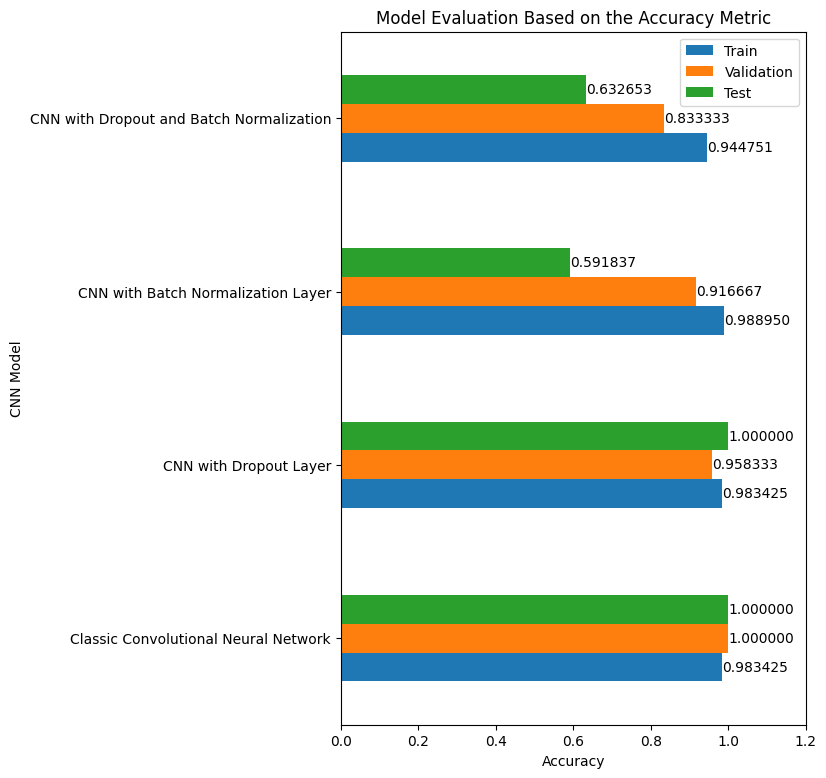

In [ ]:
model_scores_accuracy = pd.DataFrame( { "Train" : model_scores_accuracy["Train"],
                      "Validation" : model_scores_accuracy["Validation"],
                      "Test" : model_scores_accuracy["Test"] },
                     index = [ "Classic Convolutional Neural Network",
                            "CNN with Dropout Layer",
                            "CNN with Batch Normalization Layer",
                            "CNN with Dropout and Batch Normalization" ] )

ax = model_scores_accuracy.plot.barh( figsize = (6, 9),
                     xlabel = "Accuracy",
                     ylabel = "CNN Model",
                     title = "Model Evaluation Based on the Accuracy Metric",
                     xlim = [0, 1.2] )

for container in ax.containers:
  ax.bar_label(container, fmt='%.6f')

plt.show()

From the figure above, it is evident that both the classic convolutional neural network and the CNN with only a dropout layer perform well across the three datasets. However, the two CNN models incorporating batch normalization layers exhibits overfitting to the training set, which leads to a significant decline in performance on the test set.

**Model Evaluation Based on the Loss Metric**

In [ ]:
model_scores_loss = pd.DataFrame( { "Train" : model_scores_loss["Train"],
                    "Validation" : model_scores_loss["Validation"],
                    "Test" : model_scores_loss["Test"] },
                   index = [ "Classic Convolutional Neural Network",
                          "CNN with Dropout Layer",
                          "CNN with Batch Normalization Layer",
                          "CNN with Dropout and Batch Normalization" ] )

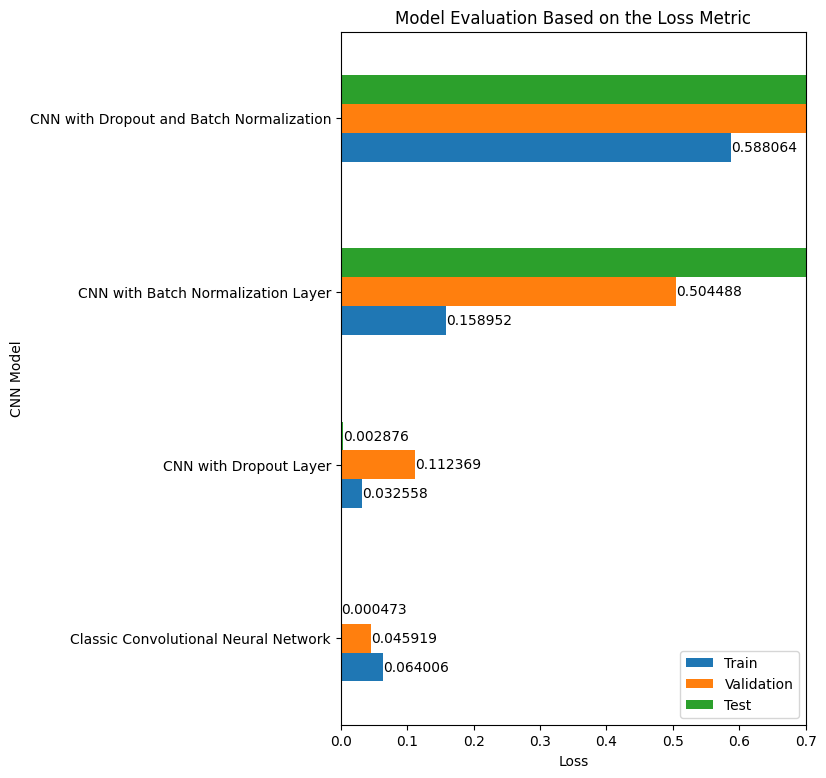

In [ ]:
ax = model_scores_loss.plot.barh( figsize = (6, 9),
                     xlabel = "Loss",
                     ylabel = "CNN Model",
                     title = "Model Evaluation Based on the Loss Metric",
                     xlim = [0, 0.7] )

for container in ax.containers:
  ax.bar_label(container, fmt='%.6f')

plt.show()

From the figure above, it is clear that both the classic convolutional neural network and the CNN with only a dropout layer perform well on the test set. However, the CNN with only a dropout layer exhibits slight overfitting on the training set. In contrast, the two CNN models incorporating batch normalization layers show significantly higher loss on both the validation and test sets, indicating that the batch normalization layers have adversely impacted the performance of the CNN models.

**Model Evaluation by Confusion Matrix on the Test Set**

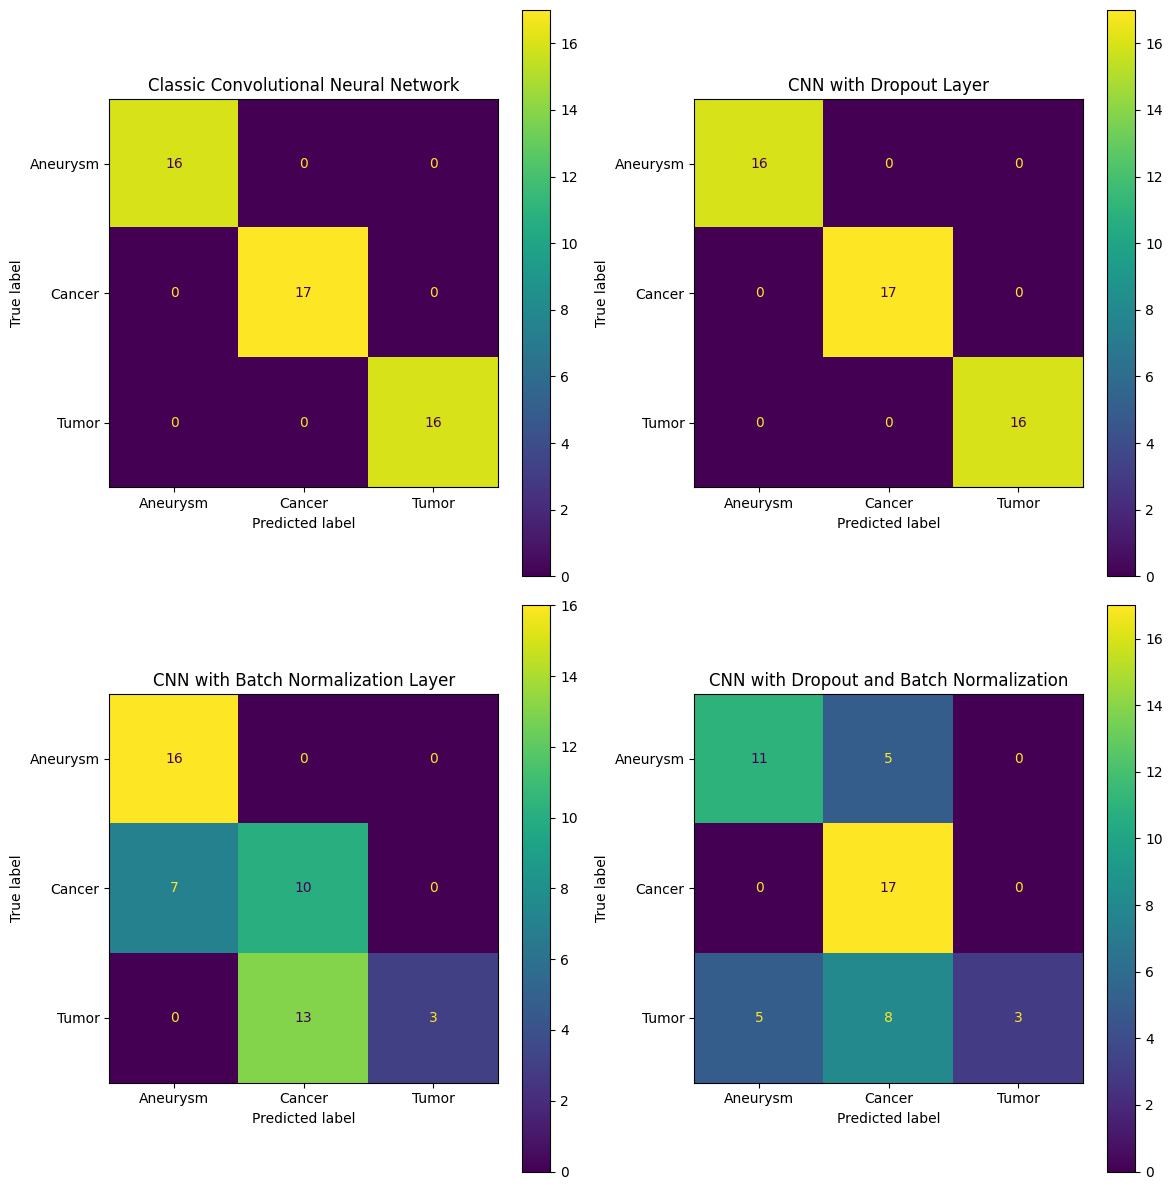

In [ ]:
model_scores_confusion_matrices = { "Classic Convolutional Neural Network" : model_CNN_classic,
                    "CNN with Dropout Layer" : model_CNN_dropout,
                    "CNN with Batch Normalization Layer" : model_CNN_BN,
                    "CNN with Dropout and Batch Normalization" : model_CNN_dropout_BN }

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax = ax.ravel()

for index, (name, model) in enumerate(model_scores_confusion_matrices.items()):
  y_hat = np.array(list(map(lambda x: np.argmax(x), model.predict(data_test, verbose=0))))

  cmd = ConfusionMatrixDisplay(confusion_matrix(data_test.classes, y_hat), display_labels=["Aneurysm", "Cancer", "Tumor"])
  cmd.plot(ax=ax[index])
  cmd.ax_.set_title(name)

plt.tight_layout()
plt.show()

From the confusion matrix we get the following information:

| Diagnosis | Classic Convolutional Neural Network | CNN with Dropout Layer | CNN with Batch Normalization Layer | CNN with Dropout and Batch Normalization |
| :---: | :---: | :---: | :---: | :---: |
| Aneurysm | 0 Failed | 0 Failed | 0 Failed | 5 Failed |
| Cancer | 0 Failed | 0 Failed | 7 Failed | 0 Failed |
| Tumor | 0 Failed | 0 Failed | 3 Failed | 8 Failed |
| **Total** | **0 Failed** | **0 Failed** | **10 Failed** | **13 Failed** |

---

### **4.2 - Summary** <span id="4.2"></span>

The analysis in the preceding sections indicates that the classic convolutional neural network (CNN) is the most suitable model for this project. While the CNN with only a dropout layer performs similarly, it shows signs of slight overfitting, leading to reduced robustness on the training and validation sets compared to the classic CNN.

Despite the rapid convergence typical of models using batch normalization, the two CNN models incorporating batch normalization layers performed poorly on the validation and test sets. Analyzing the underlying reasons may provide insights.

During training, the batch normalization layer uses running averages of the mean and variance to approximate population statistics, with the momentum parameter controlling the speed at which these averages are updated. With a typical momentum value of 1, a higher value can result in the model retaining outdated statistics, slowing its adaptation to new data and degrading validation performance. The mean and variance are generally initialized to 0 and 1, respectively, and are updated by scaling with the momentum parameter while incorporating a fraction (e.g., 0.01) of the new value. As a result, the running averages may take longer to reflect the true mean and variance of the data, particularly when the momentum value is set too high.

<br/>

In future work, we should adjust the kinetic energy parameters of the batch normalization layer to validate our previous conjecture. Additionally, we should explore the use of alternative activation functions, such as the hyperbolic tangent (tanh) and the sobolev modified hyperbolic tangent (smht).

---
---

# **5. REFERENCES** <span id="5"></span>

---
---


| Sources | Article | Author |
| :--- | :--- | :--- |
| Book | [Practitioner's Guide to Data Science](https://scientistcafe.com/ids/) | Hui Lin & Ming Li |
| Book | [Dive into Deep Learning](https://d2l.ai/index.html) | A. Zhang, Z. Lipton, M. Li & A. Smola |
| Book | [Machine Learning Guide for Oil and Gas Using Python](https://www.sciencedirect.com/book/9780128219294/machine-learning-guide-for-oil-and-gas-using-python) | Hoss Belyadi & Alireza Haghighat |
| Kaggle | [Computed Tomography (CT) of the Brain](https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-brain/data) | Training Data Company |
| IBM | [What are convolutional neural networks?](https://www.ibm.com/topics/convolutional-neural-networks) | IBM Team |
| Medium | [Image Augmentation Techniques](https://medium.com/@jyotsana.cg/image-augmentation-techniques-798243f6afdf) | Jyotsana |
| GeeksforGeeks | [Univariate, Bivariate and Multivariate data and its analysis](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/) | Aaradhana Thapliyal |
| TurinTech AI | [Data Quality in Machine Learning: How to Evaluate and Improve?](https://www.turintech.ai/data-quality-in-machine-learning-how-to-evaluate-and-improve/) | Chrystalla Pavlou |
| Tableau | [Guide To Data Cleaning: Definition, Benefits, Components, And How To Clean Your Data](https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=tools%20and%20software-,What%20is%20data%20cleaning%3F,to%20be%20duplicated%20or%20mislabeled) | Tableau Team |
| Deepchecks | [Understanding F1 Score, Accuracy, ROC-AUC, and PR-AUC Metrics for Models](https://www.deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/) | Community Blog |
| Baeldung | [Training and Validation Loss in Deep Learning](https://www.baeldung.com/cs/training-validation-loss-deep-learning) | Baeldung Team |
| Machine Learning Mastery | [Image Augmentation with Keras Preprocessing Layers and tf.image](https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/) | Adrian Tam |